In [28]:
import os, shutil
from os.path import join
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#original_dataset_dir = '/Users/Admin/Downloads/PetImages'

mydata_source ='C:/Users/Admin/Documents/Nueral Networks/PetImages'
base_dir ='C:/Users/Admin/Documents/Nueral Networks/cats_and_dogs'
os.mkdir(base_dir)


In [3]:
train_dir =os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [4]:
test_dir =os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
validation_dir =os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [6]:
train_cats_dir =os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [7]:
train_dogs_dir =os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [8]:
test_cats_dir =os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [9]:
test_dogs_dir =os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [10]:
validation_cats_dir =os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [11]:
validation_dogs_dir =os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [14]:
fnames =['{}.jpg'.format(i) for i in range(1000)]
try:
    for fname in fnames:
        src =os.path.join(mydata_source, fname)
        dst =os.path.join(base_dir, fname)
        shutil.copyfile(src, dst)
except FileNotFoundError:
    print('Can not locate the file',fname)

Can not locate the file 0.jpg


In [15]:
print('total training Cat images:', len(os.listdir(train_cats_dir)),'and the total training Dog images is',len(os.listdir(train_dogs_dir)))

total training Cat images: 1000 and the total training Dog images is 1000


In [16]:
print('Total testing Cat images is ',len(os.listdir(test_cats_dir)),'and total testing Dog images is',len(os.listdir(test_dogs_dir)))

Total testing Cat images is  500 and total testing Dog images is 500


In [17]:
print('The total validation dog images is', len(os.listdir(validation_dogs_dir)),' and the total validation cat images is',len(os.listdir(validation_cats_dir)))

The total validation dog images is 500  and the total validation cat images is 500


In [18]:
from keras import layers
from keras import models

In [19]:
model =models.Sequential()

In [20]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Compilation of my network

In [22]:
model.compile(optimizer='RMSprop',
             loss='binary_crossentropy', metrics =['accuracy'])

# Using the ImageDataGenerator() class to read the files

In [23]:
train_datagenerated =ImageDataGenerator(rescale=1.0/255)
test_datagenerated =ImageDataGenerator(rescale =1./255)

# Resize all the images into pixels

In [24]:
train_generator =train_datagenerated.flow_from_directory( train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
validation_generator =test_datagenerated.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [26]:
for train_batch, label_batch in train_generator:
    print('train is ',train_batch.shape)
    print('the label shape is',label_batch.shape)
    break

train is  (20, 150, 150, 3)
the label shape is (20,)


# fitting our model using the fit() method

In [70]:
history =model.fit_generator(train_generator, steps_per_epoch=100, epochs =50, 
                           validation_data=validation_generator, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 81s 813ms/step - loss: 0.0949 - accuracy: 0.9880 - val_loss: 0.4206 - val_accuracy: 0.6940
Epoch 2/50
100/100 [==============================] - 93s 925ms/step - loss: 0.0434 - accuracy: 0.9945 - val_loss: 3.3589 - val_accuracy: 0.7070
Epoch 3/50
100/100 [==============================] - 87s 870ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 10.5143 - val_accuracy: 0.7140
Epoch 4/50
100/100 [==============================] - 81s 806ms/step - loss: 0.1058 - accuracy: 0.9875 - val_loss: 0.8478 - val_accuracy: 0.7230
Epoch 5/50
100/100 [==============================] - 64s 643ms/step - loss: 0.0568 - accuracy: 0.9900 - val_loss: 3.8194 - val_accuracy: 0.6950
Epoch 6/50
100/100 [==============================] - 63s 634ms/step - loss: 0.0450 - accuracy: 0.9940 - val_loss: 1.4555 - val_accuracy: 0.6910
Epoch 7/50
100/100 [==============================] - 63s 632ms/step - loss: 0.0653 - accuracy: 0.9925 - val_loss: 3.8715 - val_a

# Saving my model

In [71]:
model.save('cats_and_dogs.h5')

# Let's plot the loss and accuracy of the model over the training and  validation data

In [72]:
history_dict =history.history

In [73]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [74]:
train_loss =history_dict['loss']
train_accuracy =history_dict['accuracy']

validation_accuracy =history_dict['val_accuracy']
validation_loss =history_dict['val_loss']
#epochs = range(1, len(acc) + 1)


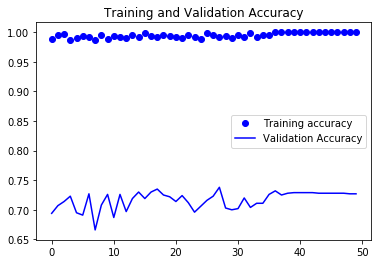

In [75]:
plt.title('Training and Validation Accuracy')
plt.plot( train_accuracy,'bo', label='Training accuracy')
plt.plot( validation_accuracy, 'b', label='Validation Accuracy')
plt.legend()

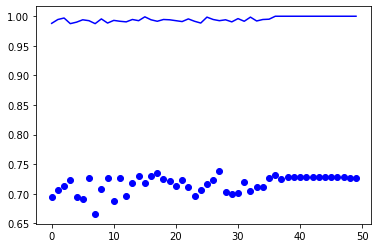

In [76]:
plt.plot(validation_accuracy, 'bo', label='Validation loss')
plt.plot(train_accuracy,'b', label='Validation accuracy')